# HackerEarth Power Prediction

## Importing Required Libraries

In [1]:
import numpy as np                   # For creating matrices and for number operations
import pandas as pd                  # For manipulating and reading data
import matplotlib.pyplot as plt      # for ploting graphs
import seaborn as sns                # To plot heatmaps
sns.set_style("darkgrid")            
import warnings                      # Hide warnings
warnings.filterwarnings('ignore')

## Data Viewing

In [2]:
df = pd.read_csv("Data/Secondary/Power Pediction Hackerearth/Train.csv" , parse_dates = ["datetime"] , low_memory = False)
df.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   tracking_id                     28200 non-null  object        
 1   datetime                        28200 non-null  datetime64[ns]
 2   wind_speed(m/s)                 27927 non-null  float64       
 3   atmospheric_temperature(°C)     24750 non-null  float64       
 4   shaft_temperature(°C)           28198 non-null  float64       
 5   blades_angle(°)                 27984 non-null  float64       
 6   gearbox_temperature(°C)         28199 non-null  float64       
 7   engine_temperature(°C)          28188 non-null  float64       
 8   motor_torque(N-m)               28176 non-null  float64       
 9   generator_temperature(°C)       28188 non-null  float64       
 10  atmospheric_pressure(Pascal)    25493 non-null  float64       
 11  ar

In [4]:
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day

In [5]:
df['time'] = (df['datetime'].dt.hour % 24 + 4) // 4
df['time'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

In [6]:
df.isna().sum() , type(df.isna().sum())

(tracking_id                          0
 datetime                             0
 wind_speed(m/s)                    273
 atmospheric_temperature(°C)       3450
 shaft_temperature(°C)                2
 blades_angle(°)                    216
 gearbox_temperature(°C)              1
 engine_temperature(°C)              12
 motor_torque(N-m)                   24
 generator_temperature(°C)           12
 atmospheric_pressure(Pascal)      2707
 area_temperature(°C)                 0
 windmill_body_temperature(°C)     2363
 wind_direction(°)                 5103
 resistance(ohm)                      1
 rotor_torque(N-m)                  572
 turbine_status                    1759
 cloud_level                        276
 blade_length(m)                   5093
 blade_breadth(m)                     0
 windmill_height(m)                 543
 windmill_generated_power(kW/h)     207
 year                                 0
 month                                0
 day                                  0


In [7]:
# Percentage of missing values

round(df.isna().sum() * 100 / len(df) , 2).sort_values(ascending = False)

wind_direction(°)                 18.10
blade_length(m)                   18.06
atmospheric_temperature(°C)       12.23
atmospheric_pressure(Pascal)       9.60
windmill_body_temperature(°C)      8.38
turbine_status                     6.24
rotor_torque(N-m)                  2.03
windmill_height(m)                 1.93
cloud_level                        0.98
wind_speed(m/s)                    0.97
blades_angle(°)                    0.77
windmill_generated_power(kW/h)     0.73
motor_torque(N-m)                  0.09
engine_temperature(°C)             0.04
generator_temperature(°C)          0.04
shaft_temperature(°C)              0.01
month                              0.00
year                               0.00
day                                0.00
tracking_id                        0.00
blade_breadth(m)                   0.00
resistance(ohm)                    0.00
datetime                           0.00
area_temperature(°C)               0.00
gearbox_temperature(°C)            0.00


<AxesSubplot:>

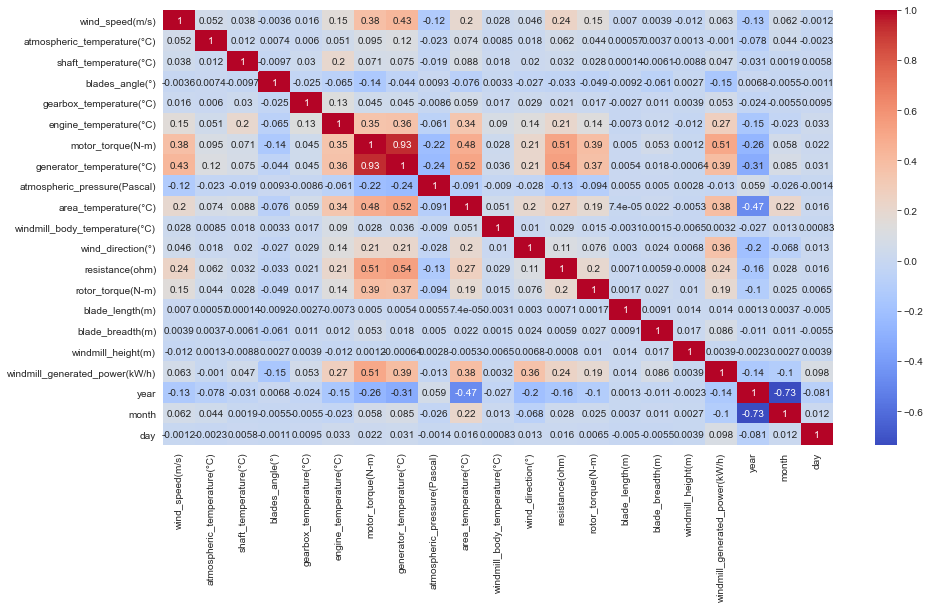

In [8]:
plt.figure(figsize = (15 , 8))
sns.heatmap(df.corr() , annot = True , cmap = "coolwarm")

<AxesSubplot:>

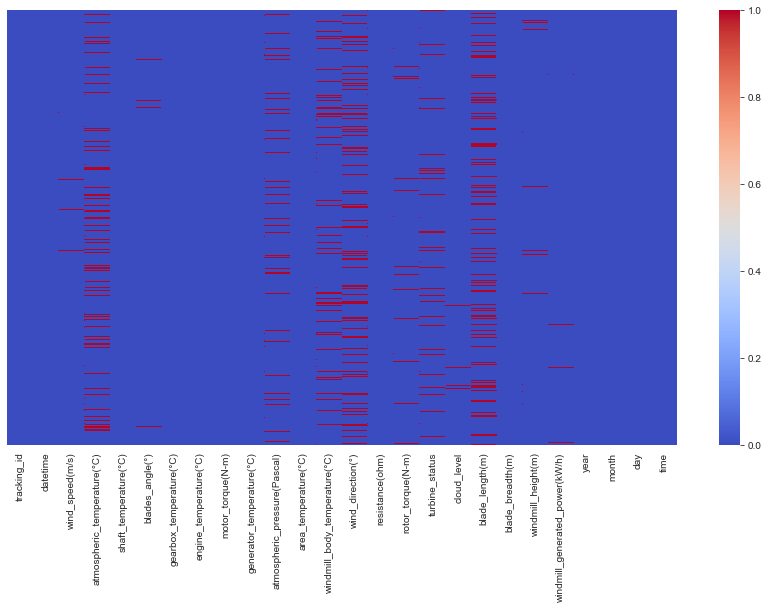

In [9]:
plt.figure(figsize = (15 , 8))                                      # Heatmap for missing values in dataframe
sns.heatmap(df.isnull() , cmap = "coolwarm" , yticklabels = False)

In [10]:
# To eliminate correlation

df.drop(["motor_torque(N-m)"] , axis = 1 , inplace = True)

<AxesSubplot:>

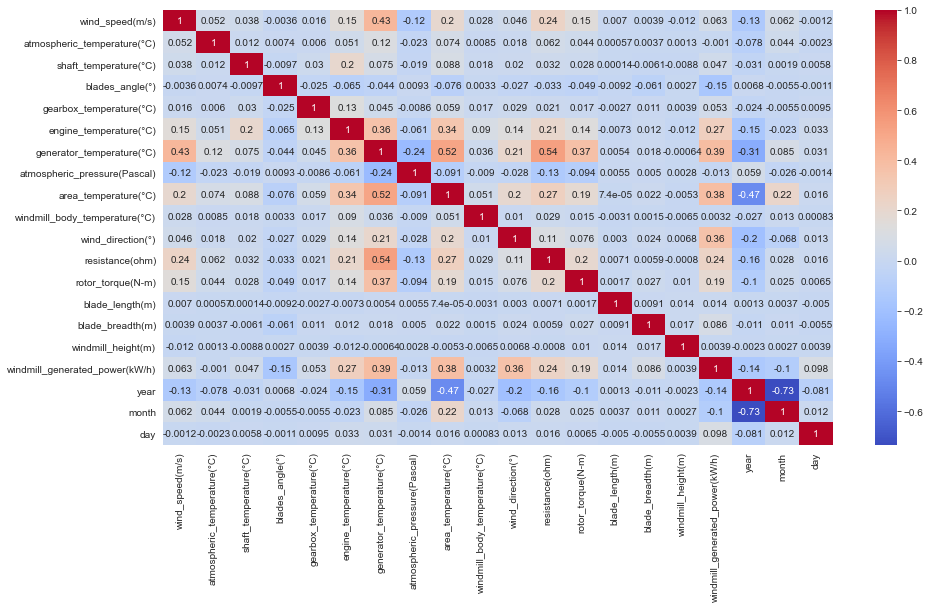

In [11]:
plt.figure(figsize = (15 , 8))
sns.heatmap(df.corr() , annot = True , cmap = "coolwarm")

In [12]:
test = pd.read_csv("Data/Secondary/Power Pediction Hackerearth/Test.csv" , parse_dates = ["datetime"] , low_memory = False)    # Loading test dataset
test.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,WM_19817,2019-04-17 08:53:20,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,66.830037,...,24.004812,43.756693,445.976992,1664.222023,21.912243,BA,Medium,3.185837,0.403965,25.572431
1,WM_18723,2019-03-30 07:43:20,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,37.284163,...,29.431813,42.728174,499.595287,1165.111992,-35.050093,A,Medium,3.016603,0.444755,24.371823
2,WM_34552,2019-08-10 11:33:20,347.152090,31.423035,41.076640,26.931602,43.109122,43.439556,1480.716492,70.010762,...,29.924235,43.256122,245.432231,1667.720491,27.195302,B2,Medium,2.611941,0.387368,27.654677
3,WM_28570,2019-06-26 03:53:20,24.471997,-99.000000,14.375078,66.513953,13.741253,15.577472,887.979475,41.445258,...,23.886434,13.501595,NaN,1329.744740,15.245757,BBB,Low,2.866805,0.450478,24.189426
4,WM_36934,2019-08-27 16:43:20,96.997026,33.281836,41.405192,1.843112,121.572907,43.934587,2053.916354,68.007787,...,35.906889,-99.000000,442.425744,691.408996,34.257024,A,Low,3.549672,0.368355,4.885440


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tracking_id                    12086 non-null  object        
 1   datetime                       12086 non-null  datetime64[ns]
 2   wind_speed(m/s)                11960 non-null  float64       
 3   atmospheric_temperature(°C)    10659 non-null  float64       
 4   shaft_temperature(°C)          12085 non-null  float64       
 5   blades_angle(°)                11980 non-null  float64       
 6   gearbox_temperature(°C)        12085 non-null  float64       
 7   engine_temperature(°C)         12081 non-null  float64       
 8   motor_torque(N-m)              12075 non-null  float64       
 9   generator_temperature(°C)      12081 non-null  float64       
 10  atmospheric_pressure(Pascal)   10935 non-null  float64       
 11  area_temperatur

In [14]:
ids = test["tracking_id"]
datetime = test["datetime"]
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test['time'] = (test['datetime'].dt.hour % 24 + 4) // 4
test['time'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

In [15]:
test.isna().sum()

tracking_id                         0
datetime                            0
wind_speed(m/s)                   126
atmospheric_temperature(°C)      1427
shaft_temperature(°C)               1
blades_angle(°)                   106
gearbox_temperature(°C)             1
engine_temperature(°C)              5
motor_torque(N-m)                  11
generator_temperature(°C)           5
atmospheric_pressure(Pascal)     1151
area_temperature(°C)                1
windmill_body_temperature(°C)     926
wind_direction(°)                2160
resistance(ohm)                     0
rotor_torque(N-m)                 281
turbine_status                    797
cloud_level                       125
blade_length(m)                  2114
blade_breadth(m)                    0
windmill_height(m)                255
year                                0
month                               0
day                                 0
time                                0
dtype: int64

In [16]:
round(test.isna().sum() * 100 / len(df) , 2).sort_values(ascending = False)

wind_direction(°)                7.66
blade_length(m)                  7.50
atmospheric_temperature(°C)      5.06
atmospheric_pressure(Pascal)     4.08
windmill_body_temperature(°C)    3.28
turbine_status                   2.83
rotor_torque(N-m)                1.00
windmill_height(m)               0.90
wind_speed(m/s)                  0.45
cloud_level                      0.44
blades_angle(°)                  0.38
motor_torque(N-m)                0.04
engine_temperature(°C)           0.02
generator_temperature(°C)        0.02
year                             0.00
month                            0.00
blade_breadth(m)                 0.00
day                              0.00
tracking_id                      0.00
resistance(ohm)                  0.00
datetime                         0.00
area_temperature(°C)             0.00
gearbox_temperature(°C)          0.00
shaft_temperature(°C)            0.00
time                             0.00
dtype: float64

In [17]:
test.drop(["motor_torque(N-m)"] , axis = 1 , inplace = True)

In [18]:
df.drop(["tracking_id" , "datetime"] , axis = 1 , inplace = True)
df.head()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),...,turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h),year,month,day,time
0,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,76.665560,103402.961872,26.897875,NaN,...,BA,Medium,2.217542,0.314065,24.281689,6.766521,2019,8,4,Noon
1,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,78.129803,17030.904078,39.801469,NaN,...,A2,Medium,4.210346,0.448494,27.262139,5.966275,2018,11,5,Morning
2,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,67.654469,16125.927107,36.116065,45.033197,...,ABC,Medium,2.719475,0.302321,27.366127,2.874342,2019,9,14,Noon
3,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,95.389974,18689.732336,46.020045,44.827154,...,ABC,NaN,4.857385,0.367140,24.287767,14.851089,2018,12,25,Noon
4,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,37.423065,114468.169007,34.572941,-99.000000,...,AAA,Medium,NaN,0.453374,27.971650,3.519074,2019,5,4,Late Night


In [19]:
test.drop(["tracking_id" , "datetime"] , axis = 1 , inplace = True)

In [20]:
cats = df.select_dtypes(include="object").columns.to_list()
cats

['turbine_status', 'cloud_level', 'time']

In [21]:
ints = df.select_dtypes(exclude="object").columns.to_list()
ints

['wind_speed(m/s)',
 'atmospheric_temperature(°C)',
 'shaft_temperature(°C)',
 'blades_angle(°)',
 'gearbox_temperature(°C)',
 'engine_temperature(°C)',
 'generator_temperature(°C)',
 'atmospheric_pressure(Pascal)',
 'area_temperature(°C)',
 'windmill_body_temperature(°C)',
 'wind_direction(°)',
 'resistance(ohm)',
 'rotor_torque(N-m)',
 'blade_length(m)',
 'blade_breadth(m)',
 'windmill_height(m)',
 'windmill_generated_power(kW/h)',
 'year',
 'month',
 'day']

## EDA Tools

In [22]:
for i in cats:
    print(f"The number of unique values in {i} column is/are {len(df[i].unique())}")
    print("\n")
    print(f"The unique values in {i} column is/are {df[i].unique()}")
    print("\n")
    print(f"The value counts for each value in {i} column is/are :  \n{df[i].value_counts()}")
    print("\n\n")
    print("*"*100)
    print("\n\n")

The number of unique values in turbine_status column is/are 15


The unique values in turbine_status column is/are ['BA' 'A2' 'ABC' 'AAA' 'BD' 'AC' 'BB' 'BCB' 'B' 'AB' nan 'B2' 'BBB' 'A'
 'D']


The value counts for each value in turbine_status column is/are :  
BB     1946
AAA    1939
BCB    1933
B2     1931
A      1930
D      1922
B      1882
AB     1868
ABC    1867
A2     1855
BA     1854
AC     1850
BD     1843
BBB    1821
Name: turbine_status, dtype: int64



****************************************************************************************************



The number of unique values in cloud_level column is/are 4


The unique values in cloud_level column is/are ['Medium' nan 'Low' 'Extremely Low']


The value counts for each value in cloud_level column is/are :  
Low              13921
Medium           13704
Extremely Low      299
Name: cloud_level, dtype: int64



****************************************************************************************************



The num

In [23]:
import random
for i in range(len(df["turbine_status"])):
    if type(df.loc[i , "turbine_status"]) == float:
        df.loc[i , "turbine_status"] = random.choice(["BB" , "AAA" , "BCB"])

In [24]:
for i in range(len(df["cloud_level"])):
    if type(df.loc[i , "cloud_level"]) == float:
        df.loc[i , "cloud_level"] = random.choice(["Low" , "Medium"])

In [25]:
for i in cats:
    print(f"The number of unique values in {i} column is/are {len(test[i].unique())}")
    print("\n")
    print(f"The unique values in {i} column is/are {test[i].unique()}")
    print("\n")
    print(f"The value counts for each value in {i} column is/are :  \n{test[i].value_counts()}")
    print("\n\n")
    print("*"*100)
    print("\n\n")

The number of unique values in turbine_status column is/are 15


The unique values in turbine_status column is/are ['BA' 'A' 'B2' 'BBB' 'BB' 'AAA' 'BCB' 'B' nan 'D' 'ABC' 'AB' 'BD' 'A2'
 'AC']


The value counts for each value in turbine_status column is/are :  
BB     871
B2     859
A      852
BBB    813
BCB    811
BA     809
AB     804
A2     796
BD     787
ABC    787
D      786
AC     778
AAA    773
B      763
Name: turbine_status, dtype: int64



****************************************************************************************************



The number of unique values in cloud_level column is/are 4


The unique values in cloud_level column is/are ['Medium' 'Low' nan 'Extremely Low']


The value counts for each value in cloud_level column is/are :  
Low              5932
Medium           5893
Extremely Low     136
Name: cloud_level, dtype: int64



****************************************************************************************************



The number of unique val

In [26]:
for i in range(len(test["turbine_status"])):
    if type(test.loc[i , "turbine_status"]) == float:
        test.loc[i , "turbine_status"] = random.choice(["BB" , "B2" , "A"])

In [27]:
for i in range(len(test["cloud_level"])):
    if type(test.loc[i , "cloud_level"]) == float:
        test.loc[i , "cloud_level"] = random.choice(["Low" , "Medium"])

In [28]:
for i in cats:
    if df[i].isna().sum() != 0:
        print(i , df[i].isna().sum())

In [29]:
for i in cats:
    if test[i].isna().sum() != 0:
        print(i , test[i].isna().sum())

In [30]:
df["year"] = df["year"].apply(lambda x : 2019 - x)

In [31]:
test["year"] = test["year"].apply(lambda x : 2019 - x)

In [32]:
df.head().T

,0,1,2,3,4
wind_speed(m/s),94.820023,241.832734,95.484724,238.819424,10.72289
atmospheric_temperature(°C),-99.0,27.764785,NaN,-99.0,NaN
shaft_temperature(°C),41.723019,-99.0,41.855473,45.443914,41.981183
blades_angle(°),-0.903423,-99.0,12.652763,15.115323,1.715696
gearbox_temperature(°C),82.410573,44.104919,42.322098,44.759643,-17.616459
engine_temperature(°C),42.523015,46.25887,42.878552,47.282101,43.469852
generator_temperature(°C),76.66556,78.129803,67.654469,95.389974,37.423065
atmospheric_pressure(Pascal),103402.961872,17030.904078,16125.927107,18689.732336,114468.169007
area_temperature(°C),26.897875,39.801469,36.116065,46.020045,34.572941
windmill_body_temperature(°C),NaN,NaN,45.033197,44.827154,-99.0


In [33]:
test.head().T

,0,1,2,3,4
wind_speed(m/s),94.324266,10.08887,347.15209,24.471997,96.997026
atmospheric_temperature(°C),17.641186,13.978119,31.423035,-99.0,33.281836
shaft_temperature(°C),89.714193,43.272846,41.07664,14.375078,41.405192
blades_angle(°),51.146788,46.516394,26.931602,66.513953,1.843112
gearbox_temperature(°C),40.46056,40.027788,43.109122,13.741253,121.572907
engine_temperature(°C),39.594734,41.17686,43.439556,15.577472,43.934587
generator_temperature(°C),66.830037,37.284163,70.010762,41.445258,68.007787
atmospheric_pressure(Pascal),16681.044117,NaN,214812.836175,NaN,16833.546517
area_temperature(°C),24.004812,29.431813,29.924235,23.886434,35.906889
windmill_body_temperature(°C),43.756693,42.728174,43.256122,13.501595,-99.0


## Data Visualization

wind_speed(m/s)


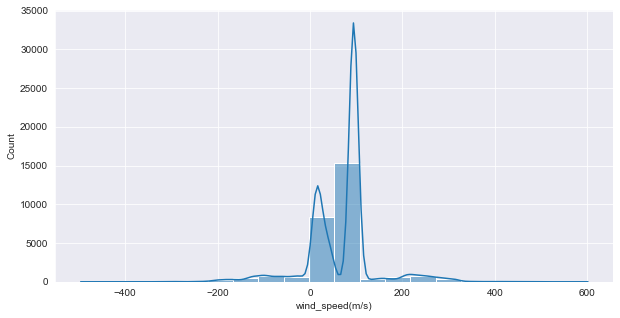




atmospheric_temperature(°C)


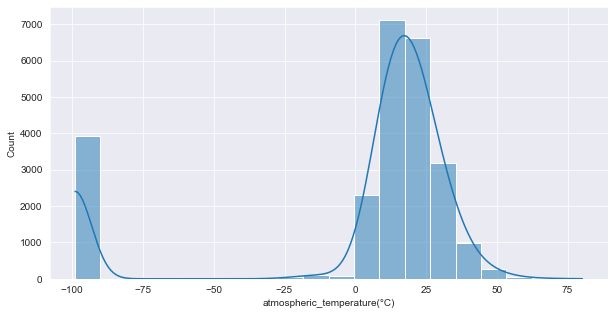




shaft_temperature(°C)


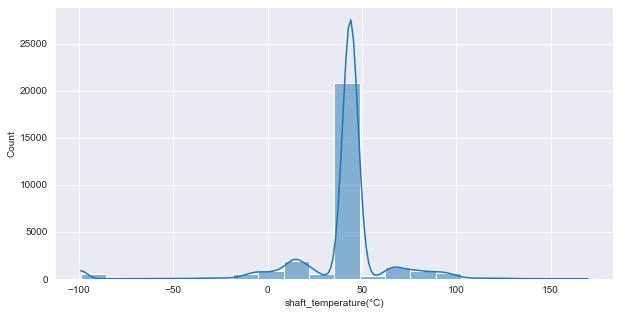




blades_angle(°)


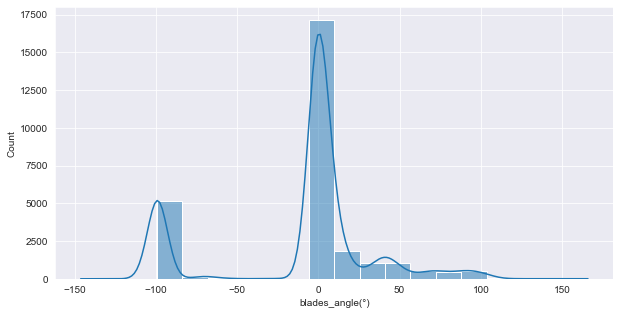




gearbox_temperature(°C)


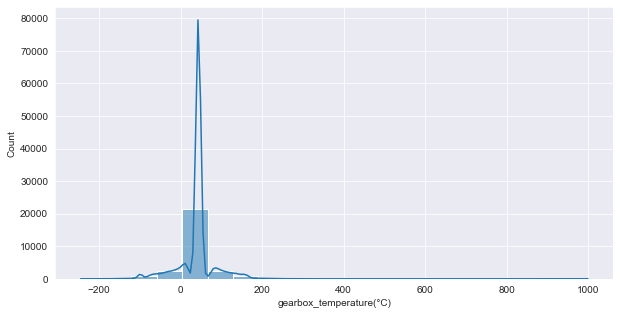




engine_temperature(°C)


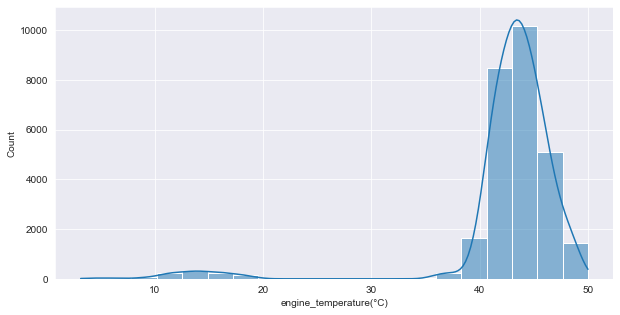




generator_temperature(°C)


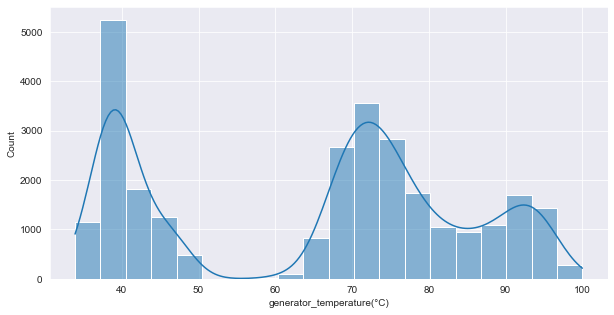




atmospheric_pressure(Pascal)


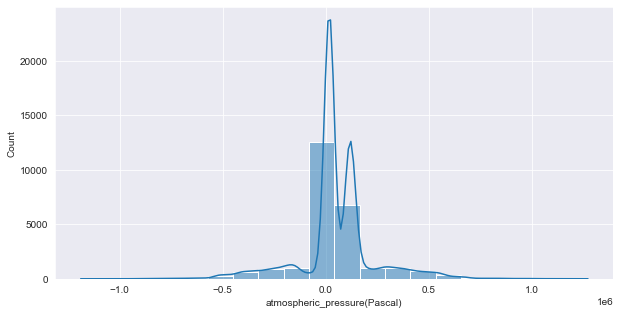




area_temperature(°C)


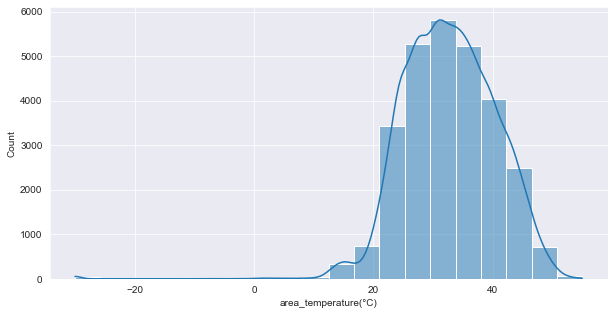




windmill_body_temperature(°C)


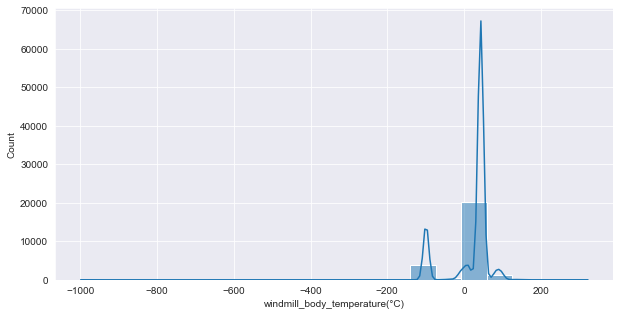




wind_direction(°)


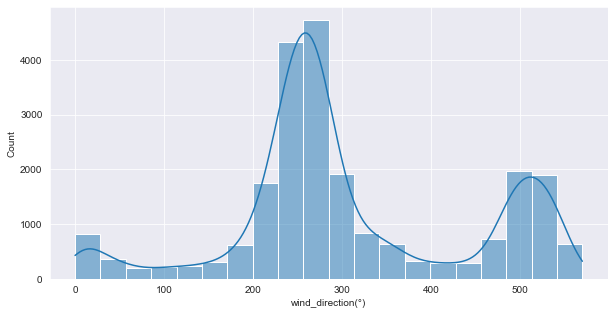




resistance(ohm)


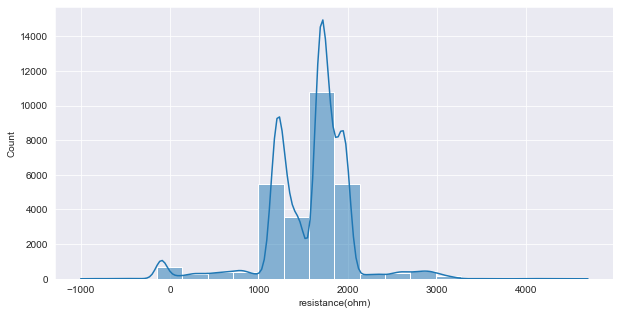




rotor_torque(N-m)


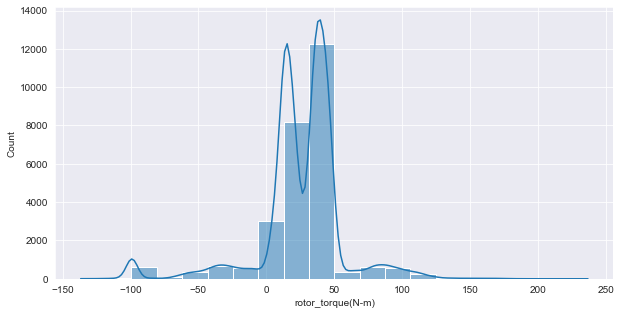




blade_length(m)


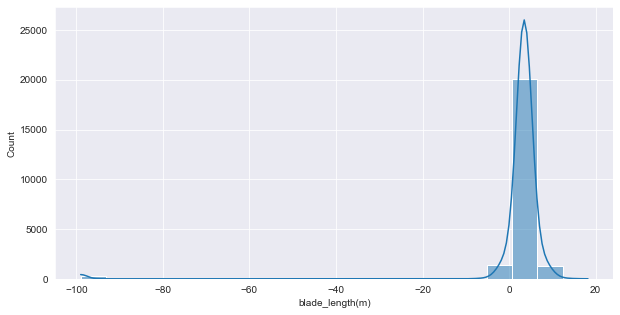




blade_breadth(m)


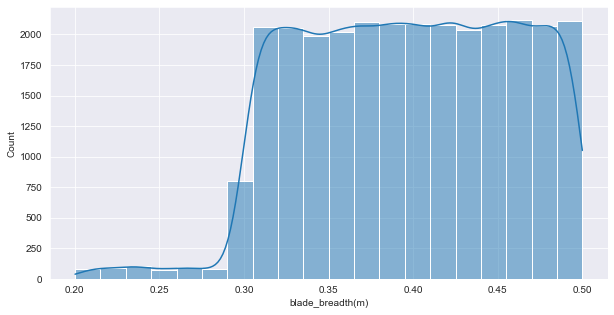




windmill_height(m)


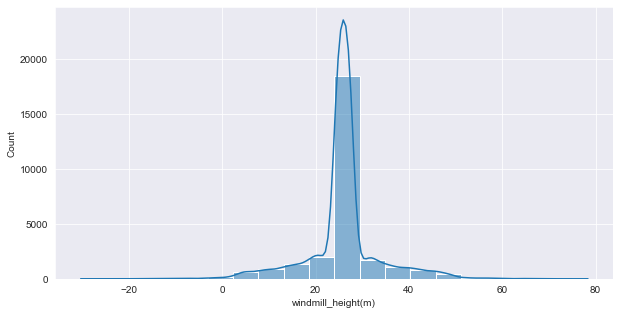




windmill_generated_power(kW/h)


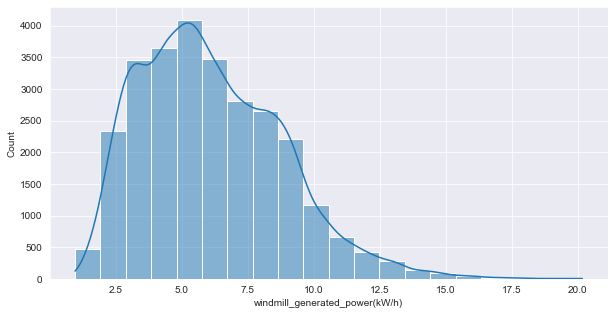




year


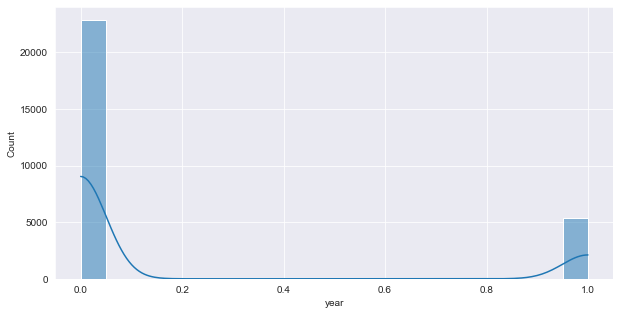




month


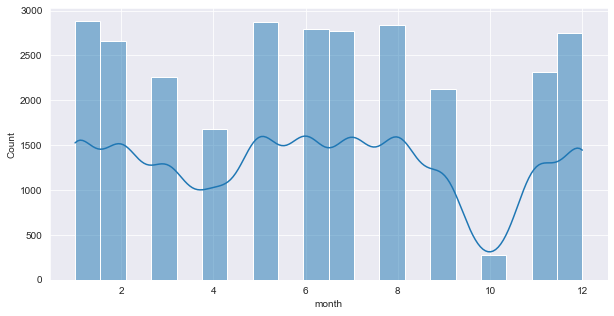




day


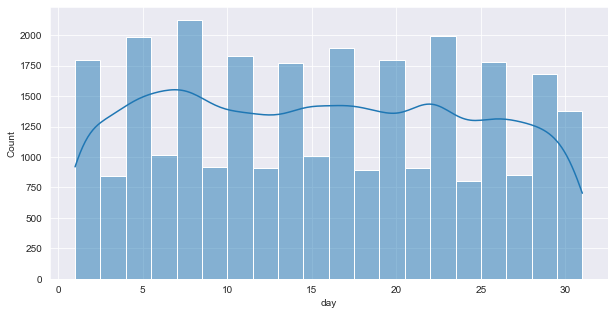

In [34]:
for i in ints:
    print(i)
    plt.figure(figsize = (10 , 5))
    sns.histplot(data = df , x = i , kde = True , bins = 20)
    plt.show()
    print("\n\n")

In [35]:
ints

['wind_speed(m/s)',
 'atmospheric_temperature(°C)',
 'shaft_temperature(°C)',
 'blades_angle(°)',
 'gearbox_temperature(°C)',
 'engine_temperature(°C)',
 'generator_temperature(°C)',
 'atmospheric_pressure(Pascal)',
 'area_temperature(°C)',
 'windmill_body_temperature(°C)',
 'wind_direction(°)',
 'resistance(ohm)',
 'rotor_torque(N-m)',
 'blade_length(m)',
 'blade_breadth(m)',
 'windmill_height(m)',
 'windmill_generated_power(kW/h)',
 'year',
 'month',
 'day']

### Removing Skewness

In [36]:
for i in ints:
    df[i] = np.log(df[i] + 1)

In [37]:
for i in ints:
    if i != 'windmill_generated_power(kW/h)':
        test[i] = np.log(test[i] + 1)

### Histplots

wind_speed(m/s)


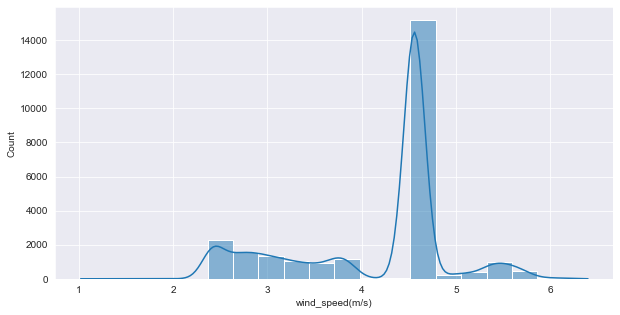




atmospheric_temperature(°C)


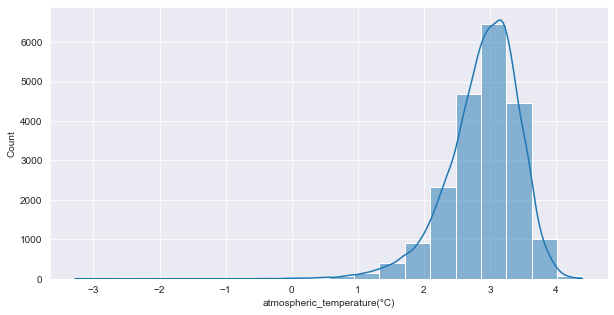




shaft_temperature(°C)


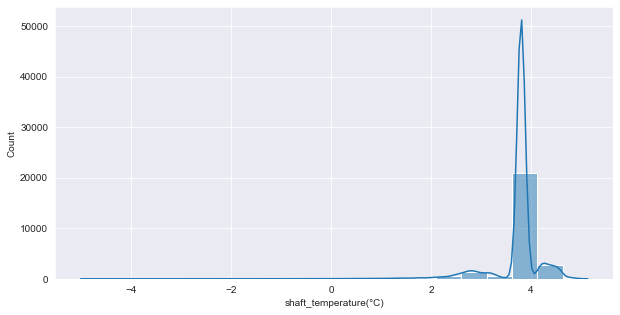




blades_angle(°)


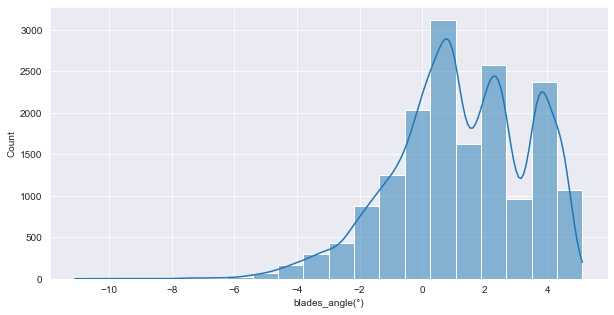




gearbox_temperature(°C)


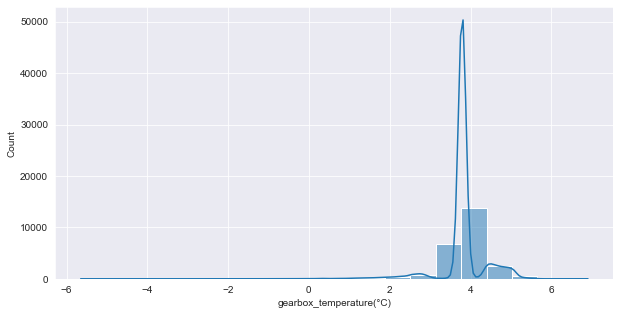




engine_temperature(°C)


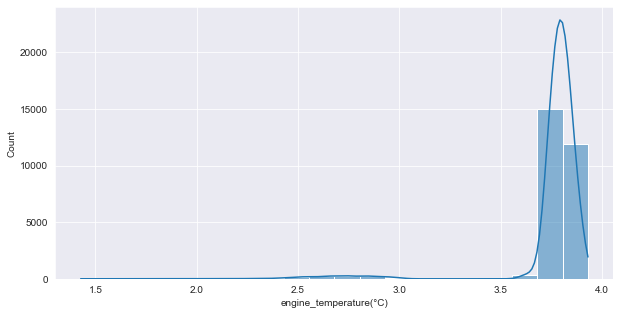




generator_temperature(°C)


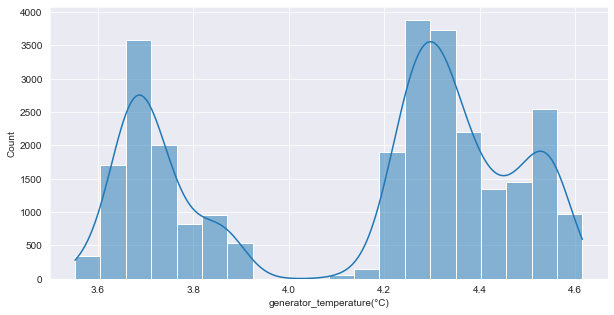




atmospheric_pressure(Pascal)


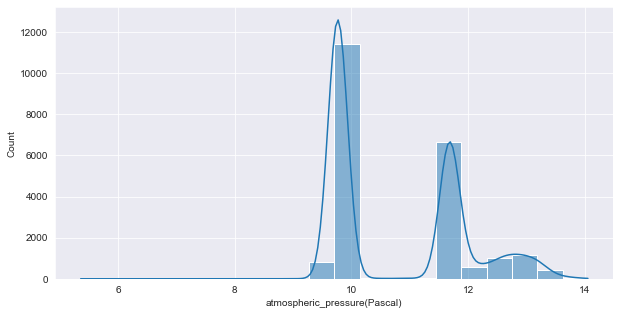




area_temperature(°C)


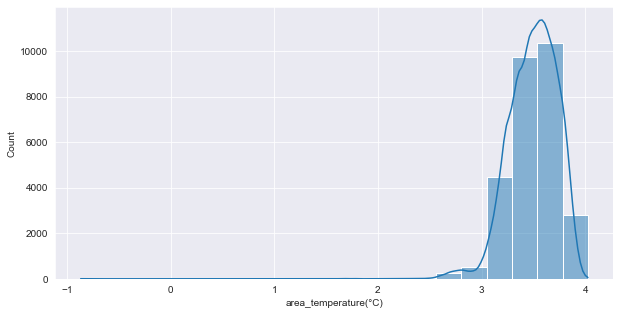




windmill_body_temperature(°C)


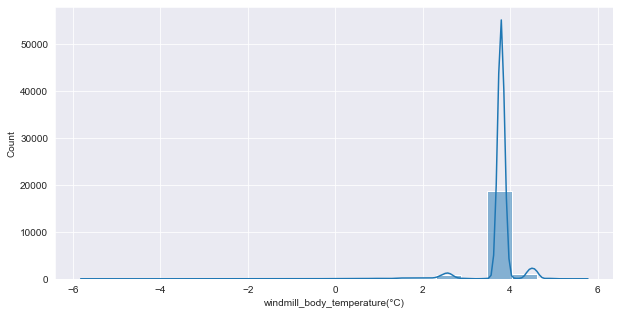




wind_direction(°)


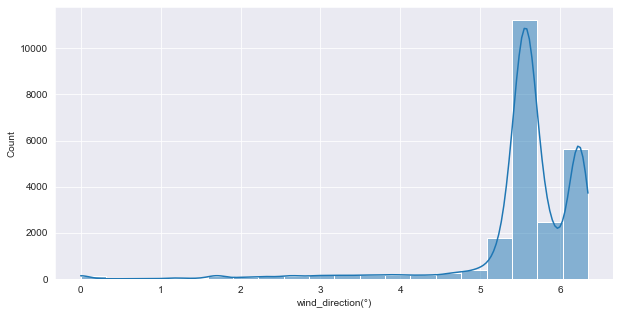




resistance(ohm)


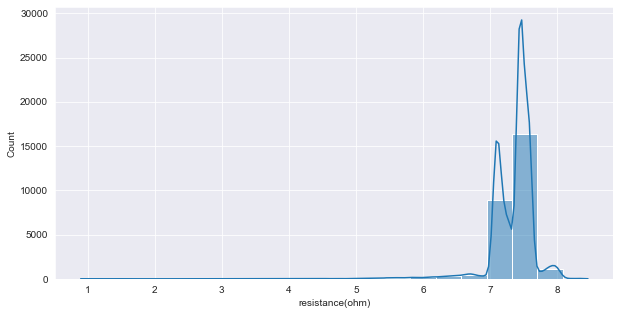




rotor_torque(N-m)


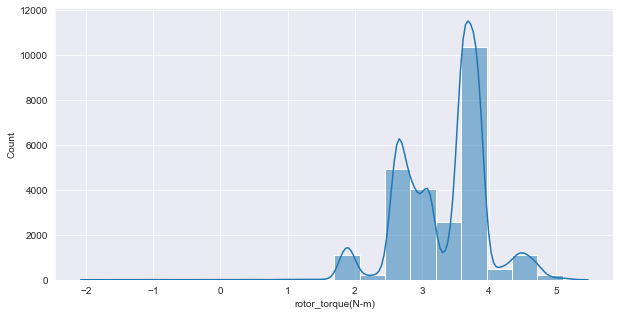




blade_length(m)


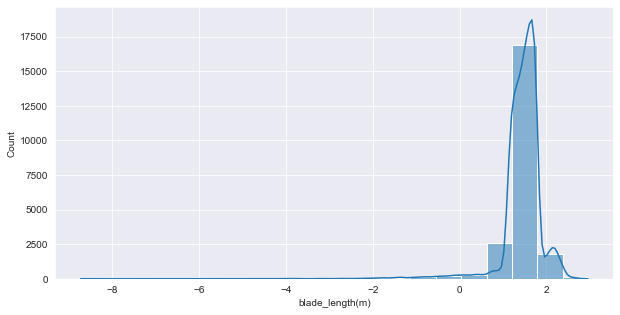




blade_breadth(m)


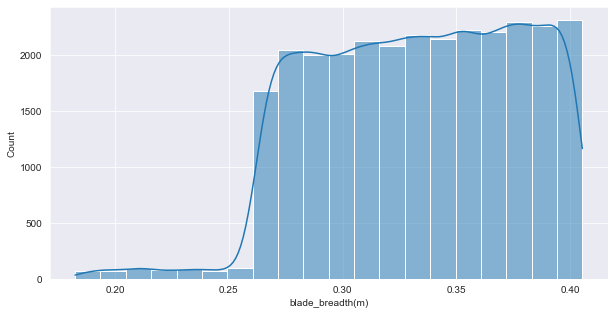




windmill_height(m)


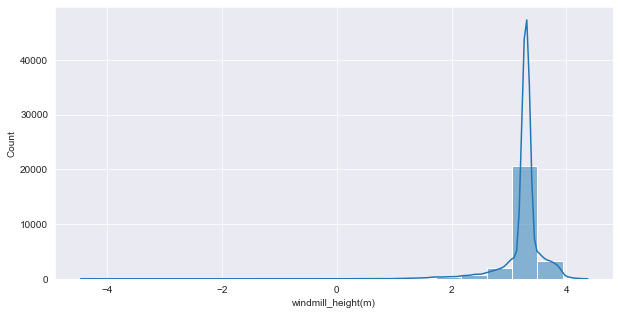




windmill_generated_power(kW/h)


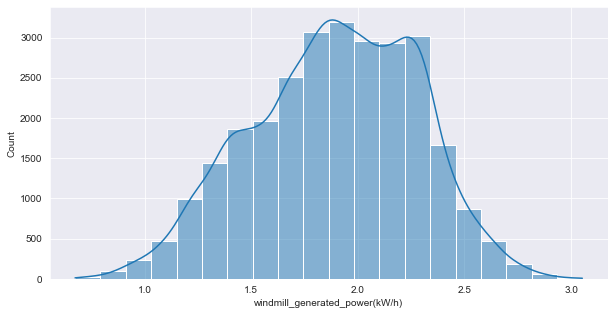




year


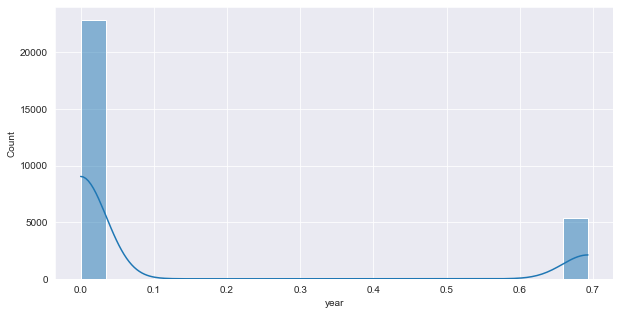




month


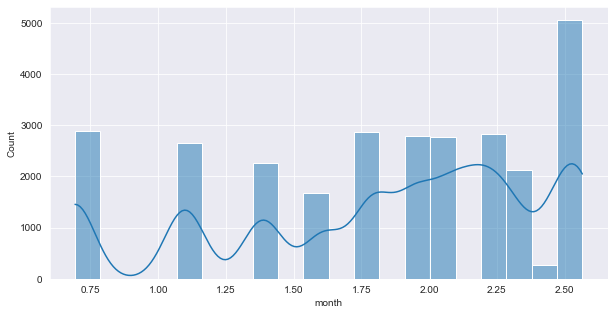




day


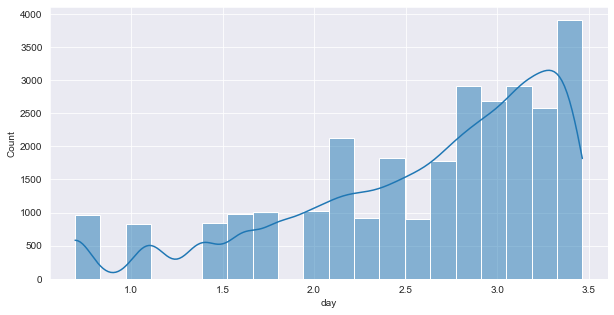

In [38]:
for i in ints:
    print(i)
    plt.figure(figsize = (10 , 5))
    sns.histplot(data = df , x = i , kde = True , bins = 20)
    plt.show()
    print("\n\n")

### Count Plots

turbine_status


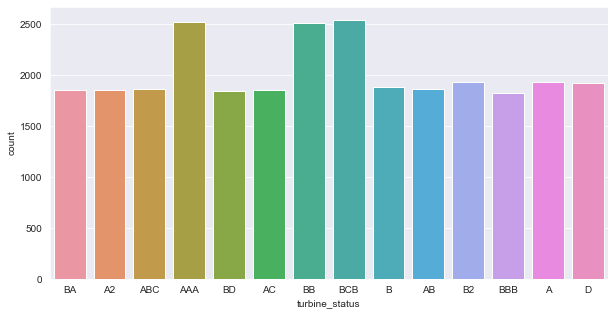




cloud_level


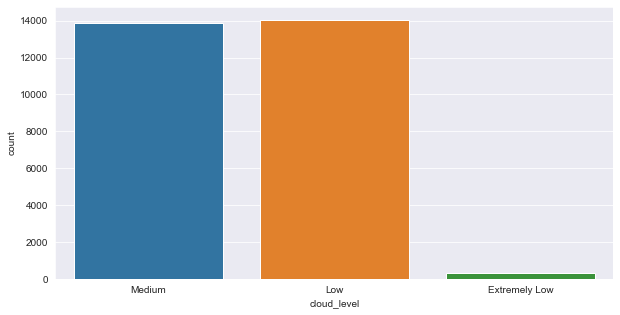




time


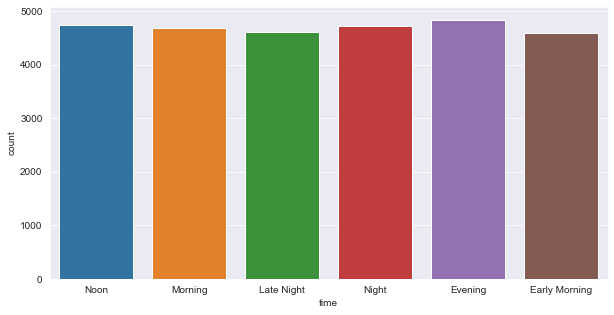

In [39]:
for i in cats:
    print(i)
    plt.figure(figsize = (10 , 5))
    sns.countplot(data = df , x = i)
    plt.show()
    print("\n\n")  

In [40]:
df = pd.get_dummies(df , columns = ["turbine_status" , "cloud_level" , "time"] , prefix = ["turbine_status" , "cloud_level" , "time"] , drop_first = True)
test = pd.get_dummies(test , columns = ["turbine_status" , "cloud_level" , "time"] , prefix = ["turbine_status" , "cloud_level" , "time"] , drop_first = True)

In [41]:
df.head().T

,0,1,2,3,4
wind_speed(m/s),4.562472,5.492373,4.569385,5.479886,2.461543
atmospheric_temperature(°C),NaN,3.359152,NaN,NaN,NaN
shaft_temperature(°C),3.754738,NaN,3.757833,3.838245,3.760762
blades_angle(°),-2.337414,NaN,2.613942,2.779771,0.999048
gearbox_temperature(°C),4.423775,3.808991,3.768663,3.823403,NaN
engine_temperature(°C),3.773290,3.855640,3.781426,3.877061,3.794811
generator_temperature(°C),4.352412,4.371090,4.229086,4.568402,3.648658
atmospheric_pressure(Pascal),11.546399,9.742844,9.688246,9.835783,11.648061
area_temperature(°C),3.328551,3.708718,3.614050,3.850574,3.571585
windmill_body_temperature(°C),NaN,NaN,3.829363,3.824877,NaN


In [42]:
test.head().T

,0,1,2,3,4
wind_speed(m/s),4.557284,2.405942,5.852639,3.237580,4.584937
atmospheric_temperature(°C),2.925373,2.706590,3.478869,NaN,3.534616
shaft_temperature(°C),4.507714,3.790372,3.739493,2.732748,3.747271
blades_angle(°),3.954063,3.861075,3.329759,4.212334,1.044899
gearbox_temperature(°C),3.724743,3.714250,3.786667,2.690650,4.808706
engine_temperature(°C),3.703638,3.741872,3.794130,2.808045,3.805208
generator_temperature(°C),4.217005,3.645036,4.262831,3.748215,4.234219
atmospheric_pressure(Pascal),9.722088,NaN,12.277527,NaN,9.731188
area_temperature(°C),3.219068,3.415489,3.431540,3.214323,3.608398
windmill_body_temperature(°C),3.801241,3.777993,3.789994,2.674259,NaN


In [43]:
for i in df.columns:
    df[i].fillna(df[i].median() , inplace = True)

In [44]:
for i in test.columns:
    test[i].fillna(df[i].median() , inplace = True)

In [45]:
df.isna().sum()

wind_speed(m/s)                   0
atmospheric_temperature(°C)       0
shaft_temperature(°C)             0
blades_angle(°)                   0
gearbox_temperature(°C)           0
engine_temperature(°C)            0
generator_temperature(°C)         0
atmospheric_pressure(Pascal)      0
area_temperature(°C)              0
windmill_body_temperature(°C)     0
wind_direction(°)                 0
resistance(ohm)                   0
rotor_torque(N-m)                 0
blade_length(m)                   0
blade_breadth(m)                  0
windmill_height(m)                0
windmill_generated_power(kW/h)    0
year                              0
month                             0
day                               0
turbine_status_A2                 0
turbine_status_AAA                0
turbine_status_AB                 0
turbine_status_ABC                0
turbine_status_AC                 0
turbine_status_B                  0
turbine_status_B2                 0
turbine_status_BA           

In [46]:
test.isna().sum()

wind_speed(m/s)                  0
atmospheric_temperature(°C)      0
shaft_temperature(°C)            0
blades_angle(°)                  0
gearbox_temperature(°C)          0
engine_temperature(°C)           0
generator_temperature(°C)        0
atmospheric_pressure(Pascal)     0
area_temperature(°C)             0
windmill_body_temperature(°C)    0
wind_direction(°)                0
resistance(ohm)                  0
rotor_torque(N-m)                0
blade_length(m)                  0
blade_breadth(m)                 0
windmill_height(m)               0
year                             0
month                            0
day                              0
turbine_status_A2                0
turbine_status_AAA               0
turbine_status_AB                0
turbine_status_ABC               0
turbine_status_AC                0
turbine_status_B                 0
turbine_status_B2                0
turbine_status_BA                0
turbine_status_BB                0
turbine_status_BBB  

<AxesSubplot:>

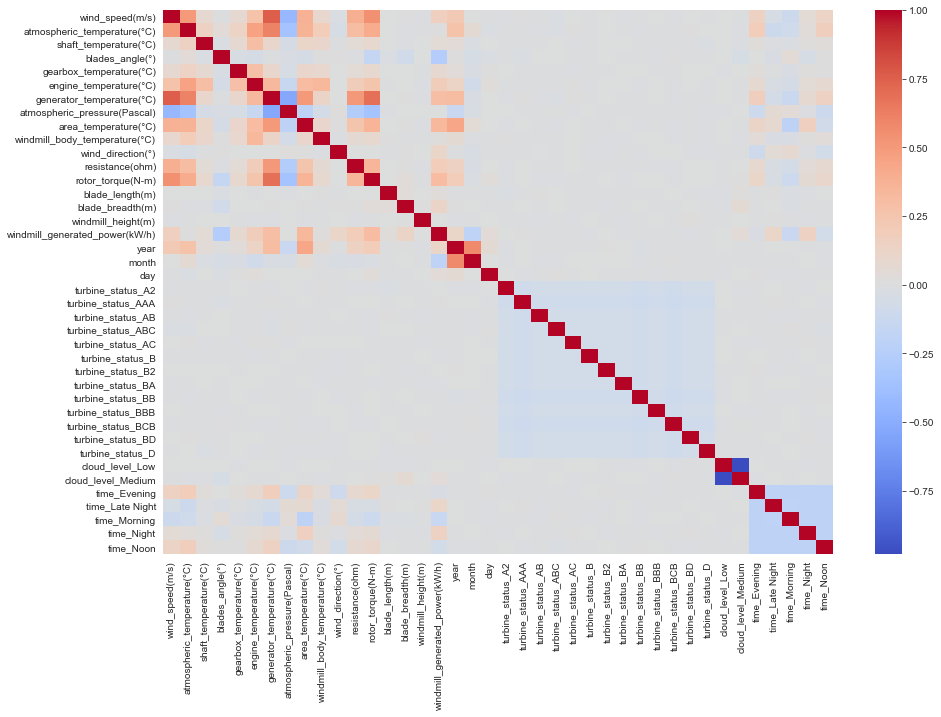

In [47]:
plt.figure(figsize = (15 , 10))
sns.heatmap(df.corr() , cmap = "coolwarm")

In [48]:
df.drop(["cloud_level_Low"] , axis = 1 , inplace = True)
test.drop(["cloud_level_Low"] , axis = 1 , inplace = True)

## Train Test Split

In [49]:
from sklearn.model_selection import train_test_split
X = df.drop(["windmill_generated_power(kW/h)"] , axis = 1)
y = df["windmill_generated_power(kW/h)"]
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(22560, 5640, 22560, 5640)

In [50]:
ints

['wind_speed(m/s)',
 'atmospheric_temperature(°C)',
 'shaft_temperature(°C)',
 'blades_angle(°)',
 'gearbox_temperature(°C)',
 'engine_temperature(°C)',
 'generator_temperature(°C)',
 'atmospheric_pressure(Pascal)',
 'area_temperature(°C)',
 'windmill_body_temperature(°C)',
 'wind_direction(°)',
 'resistance(ohm)',
 'rotor_torque(N-m)',
 'blade_length(m)',
 'blade_breadth(m)',
 'windmill_height(m)',
 'windmill_generated_power(kW/h)',
 'year',
 'month',
 'day']

In [51]:
ints.pop(-4)

'windmill_generated_power(kW/h)'

## Feature Scaling

In [52]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
X_train[ints] = scaler1.fit_transform(X_train[ints])
X_test[ints] = scaler1.transform(X_test[ints])
test[ints] = scaler1.transform(test[ints])

In [53]:
X_train.head()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),...,turbine_status_BBB,turbine_status_BCB,turbine_status_BD,turbine_status_D,cloud_level_Medium,time_Evening,time_Late Night,time_Morning,time_Night,time_Noon
1631,-1.674265,0.111777,0.193366,-1.039397,-0.005745,0.463881,-1.251065,0.959526,0.385421,0.094073,...,0,0,1,0,1,0,0,0,0,0
17088,0.464569,0.801060,0.165912,-0.047008,0.057445,0.235886,0.513364,-0.758924,-0.789376,0.102445,...,0,0,0,0,1,0,0,0,0,1
18421,0.394152,0.083827,-0.132278,-0.047008,-0.031867,0.374540,1.101975,2.305413,-7.143287,-0.231573,...,0,0,0,0,1,0,0,0,0,1
22209,0.488852,0.632887,0.128876,1.606433,0.883742,-0.072659,0.318936,-0.789018,-0.247383,0.211519,...,0,0,0,0,0,0,0,0,0,1
1534,0.483772,1.062844,0.192969,-0.737737,0.006090,0.210799,0.545765,-0.765100,-0.521831,0.188936,...,0,0,0,0,0,0,0,0,0,1


In [54]:
test.head()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),...,turbine_status_BBB,turbine_status_BCB,turbine_status_BD,turbine_status_D,cloud_level_Medium,time_Evening,time_Late Night,time_Morning,time_Night,time_Noon
0,0.467205,0.018959,1.517854,1.683402,-0.168173,-0.235972,0.235736,-0.766008,-1.144987,0.114425,...,0,0,0,0,1,0,0,1,0,0
1,-2.148106,-0.445034,0.114286,1.626806,-0.187059,-0.067146,-1.511251,-0.654679,-0.327957,0.059676,...,0,0,0,0,1,0,0,0,0,0
2,2.041922,1.192807,0.014736,1.303423,-0.056714,0.163609,0.375706,1.509872,-0.261188,0.087938,...,0,0,0,0,1,0,0,1,0,0
3,-1.137114,0.111777,-1.955083,1.840598,-2.029463,-4.190621,-1.196107,-0.654679,-1.164726,-2.539538,...,1,0,0,0,0,0,1,0,0,0
4,0.500821,1.311034,0.029955,-0.087247,1.782881,0.212525,0.288315,-0.757903,0.474471,0.094073,...,0,0,0,0,0,1,0,0,0,0


## Model Fitting

In [55]:
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor


from sklearn.metrics import mean_squared_log_error , mean_squared_error , mean_absolute_error , r2_score
from sklearn.model_selection import cross_val_score

In [56]:
models = []
models.append(['XGBRegressor', XGBRegressor(random_state = 42 , objective ='reg:squarederror')])
models.append(['AdaBoostRegressor', AdaBoostRegressor(random_state = 42)])
models.append(['RandomForest Regressor', RandomForestRegressor(random_state = 42)])
models.append(['Linear Regression', LinearRegression()])
models.append(['KNeigbors Regressor', KNeighborsRegressor()])

In [61]:
def metrics(model , X_train , y_train , X_test , y_test , params = False):
    
    mod = model[1].fit(X_train , y_train)
    preds = model[1].predict(X_test)
    accuracies = cross_val_score(estimator = model[1], X = X_train , y = y_train, cv = 10)
    log = mean_squared_log_error(preds , y_test)
    mse = mean_squared_error(preds , y_test)
    mae = mean_absolute_error(preds , y_test)
    score = max(0 , 100 * r2_score(y_test , preds))
    
    print("\n")            
    print(model[0])
    
    print("\n")
    if params:
        print(f"Best Parameters are : \n" , model[1].best_params_)
        print("\n")
    
    print(f"Training score : {model[1].score(X_train , y_train):.4f}")
    print("\n") 
    
    print(f"Test Score : {model[1].score(X_test , y_test):.4f}")
    print("\n")
    
    print(f"K-fold accuracy : {np.mean(accuracies):.4f}")
    print("\n")
    
    print(f"Standard Deviation of Accuracies in k-fold : {np.std(accuracies):.4f}")
    print("\n")
    
    print(f"Mean Absolute Error : {mae:.4f}")
    print("\n")

    print(f"Mean Squared Error : {mse:.4f}")
    print("\n")

    print(f"Mean Squared Log Error : {log:.4f}")
    print("\n")
    
    print(f"R2_score : {score:.4f}")
                
    print("\n")            
    
    plt.scatter(y_test , preds)
    x = np.linspace(min(y_test) , max(y_test) , 100)
    y = x
    plt.plot(x, y , "-r")
    plt.show()
    print("\n")

    print("*"*100)
    
    print("\n\n")
    
    sam = []
    sam.append(model[0])
    sam.append(model[1].score(X_train , y_train))
    sam.append(model[1].score(X_test , y_test))
    sam.append(np.mean(accuracies))
    sam.append(np.std(accuracies))
    sam.append(mae)
    sam.append(mse)
    sam.append(log)
    sam.append(score)
    
    return sam , mod

## Model Evaluation



XGBRegressor


Training score : 0.9808


Test Score : 0.9516


K-fold accuracy : 0.9460


Standard Deviation of Accuracies in k-fold : 0.0051


Mean Absolute Error : 0.0556


Mean Squared Error : 0.0074


Mean Squared Log Error : 0.0010


R2_score : 95.1567




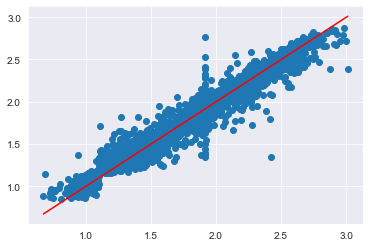



****************************************************************************************************





AdaBoostRegressor


Training score : 0.7674


Test Score : 0.7672


K-fold accuracy : 0.7529


Standard Deviation of Accuracies in k-fold : 0.0238


Mean Absolute Error : 0.1512


Mean Squared Error : 0.0355


Mean Squared Log Error : 0.0048


R2_score : 76.7182




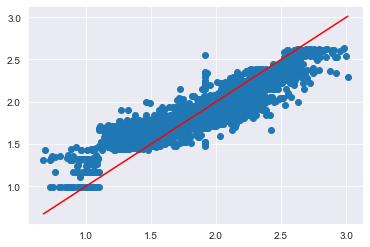



****************************************************************************************************





RandomForest Regressor


Training score : 0.9929


Test Score : 0.9547


K-fold accuracy : 0.9480


Standard Deviation of Accuracies in k-fold : 0.0059


Mean Absolute Error : 0.0505


Mean Squared Error : 0.0069


Mean Squared Log Error : 0.0010


R2_score : 95.4690




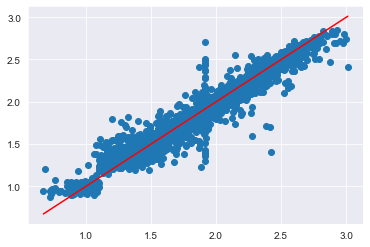



****************************************************************************************************





Linear Regression


Training score : 0.3822


Test Score : 0.3768


K-fold accuracy : 0.3793


Standard Deviation of Accuracies in k-fold : 0.0152


Mean Absolute Error : 0.2461


Mean Squared Error : 0.0950


Mean Squared Log Error : 0.0124


R2_score : 37.6766




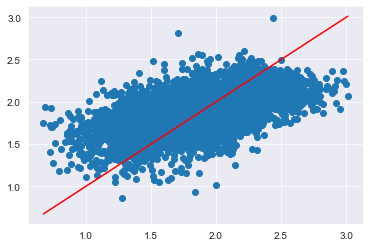



****************************************************************************************************





KNeigbors Regressor


Training score : 0.7968


Test Score : 0.6954


K-fold accuracy : 0.6911


Standard Deviation of Accuracies in k-fold : 0.0147


Mean Absolute Error : 0.1591


Mean Squared Error : 0.0464


Mean Squared Log Error : 0.0061


R2_score : 69.5368




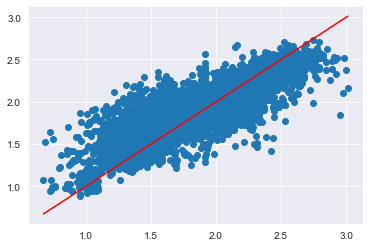



****************************************************************************************************



Wall time: 7min 54s


In [62]:
%%time

pre_final = []
for i in models:
    sam = metrics(i , X_train , y_train , X_test , y_test)
    pre_final.append(sam)

In [64]:
pre_final

[(['XGBRegressor',
   0.9808139684126538,
   0.9515666491772832,
   0.9460062803177343,
   0.005064822505279994,
   0.055567156940018556,
   0.00738414931449057,
   0.0010123294282699093,
   95.15666491772832],
  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None)),
 (['AdaBoostRegressor',
   0.767383809983387,
   0.767181696526712,
   0.7529245912995771,
   0.023760878271682186,
   0.15122399361393699,
   0.03549548166274697,
   0.004847569331973067,
   76.7

In [65]:
data_pre_final = [x[0] for x in pre_final]
data_pre_final

[['XGBRegressor',
  0.9808139684126538,
  0.9515666491772832,
  0.9460062803177343,
  0.005064822505279994,
  0.055567156940018556,
  0.00738414931449057,
  0.0010123294282699093,
  95.15666491772832],
 ['AdaBoostRegressor',
  0.767383809983387,
  0.767181696526712,
  0.7529245912995771,
  0.023760878271682186,
  0.15122399361393699,
  0.03549548166274697,
  0.004847569331973067,
  76.7181696526712],
 ['RandomForest Regressor',
  0.9929041112166848,
  0.9546896550164025,
  0.9479816487340706,
  0.005894666130149495,
  0.05053680759652477,
  0.0069080158024712734,
  0.0009602992220646547,
  95.46896550164024],
 ['Linear Regression',
  0.38216016589452706,
  0.37676633360278255,
  0.3793021721802945,
  0.015163612409543538,
  0.2461417519955799,
  0.09501821311805544,
  0.012366360492384152,
  37.67663336027825],
 ['KNeigbors Regressor',
  0.7968084450374552,
  0.6953683875559983,
  0.6911339695640873,
  0.014655959080705421,
  0.15905653026890823,
  0.04644413970931507,
  0.006147456580

## Model Evaluation Visualization

In [67]:
me = pd.DataFrame(data_pre_final , columns = ["Model" , "Train Score" , "Test Score" , "K-fold Accuracy" , "K-fold Std" , "MAE" , "MSE" , "MLSE" , "R2_Score"])

me.sort_values(by = ["R2_Score" , "MLSE" , "MSE" , "K-fold Accuracy" , "MAE" , "Train Score" , "Test Score"] , inplace = True , ascending = (False , True , True , False , True , False , False))
me = me.reset_index(drop = True)
me

,Model,Train Score,Test Score,K-fold Accuracy,K-fold Std,MAE,MSE,MLSE,R2_Score
0,RandomForest Regressor,0.992904,0.954690,0.947982,0.005895,0.050537,0.006908,0.000960,95.468966
1,XGBRegressor,0.980814,0.951567,0.946006,0.005065,0.055567,0.007384,0.001012,95.156665
2,AdaBoostRegressor,0.767384,0.767182,0.752925,0.023761,0.151224,0.035495,0.004848,76.718170
3,KNeigbors Regressor,0.796808,0.695368,0.691134,0.014656,0.159057,0.046444,0.006147,69.536839
4,Linear Regression,0.382160,0.376766,0.379302,0.015164,0.246142,0.095018,0.012366,37.676633


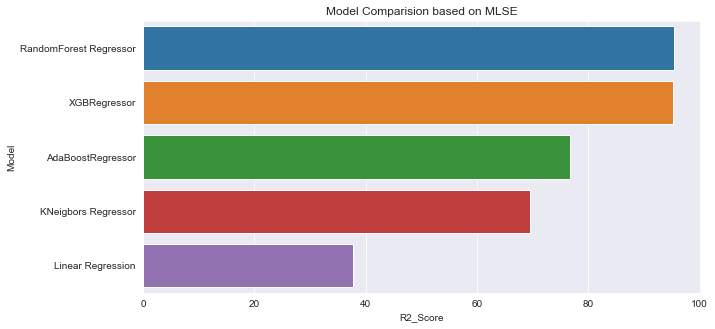

In [68]:
plt.figure(figsize = (10 , 5))
sns.barplot(y = "Model" , x = "R2_Score" , data = me)
plt.title("Model Comparision based on MLSE");

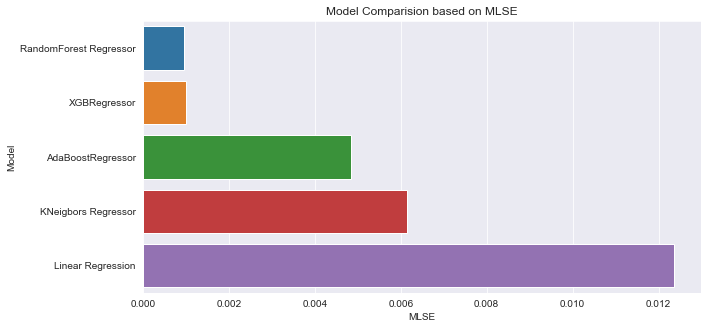

In [69]:
plt.figure(figsize = (10 , 5))
sns.barplot(y = "Model" , x = "MLSE" , data = me)
plt.title("Model Comparision based on MLSE");

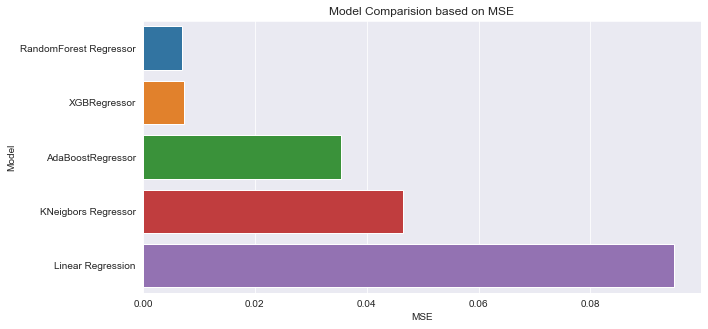

In [70]:
plt.figure(figsize = (10 , 5))
sns.barplot(y = "Model" , x = "MSE" , data = me)
plt.title("Model Comparision based on MSE");

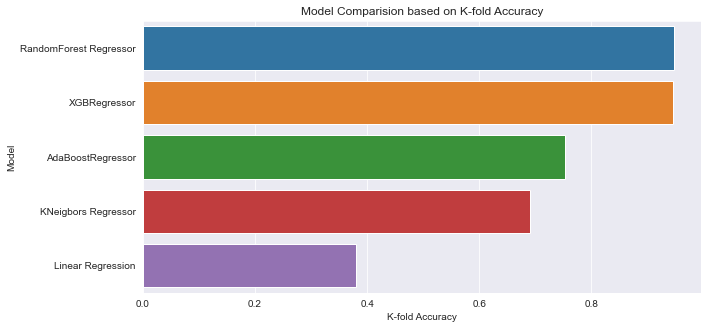

In [71]:
plt.figure(figsize = (10 , 5))
sns.barplot(y = "Model" , x = "K-fold Accuracy" , data = me)
plt.title("Model Comparision based on K-fold Accuracy");

##  Model Evaluation with Grid SearchCV

In [72]:
from sklearn.model_selection import GridSearchCV


grid_xgb = {"n_estimators" : [100 , 200 , 300 , 400]}


grid_ada = {"n_estimators" : [50 , 100 , 200]}


grid_random = {"n_estimators" : [100 , 200 , 250 , 300], 
              "max_features" : ['auto', 'sqrt' , "log2"] , 
              "min_samples_leaf" : [2, 4] , 
              "max_depth" : [5 , 7 , 10]}


grid_linear = {"max_iter" : [100 , 150] , 
              "solver" : ["liblinear"] , 
              "multi_class" : ["ovr"]}


grid_neighbor = {"n_neighbors" : [5 , 7 , 10 , 12] , 
                "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"]}

Not Done Huperparameter Tuning Due To Lack of computation speed

In [73]:
# %%time

# xgb = metrics(['XGBRegressor', GridSearchCV(XGBRegressor(random_state = 42 , objective ='reg:squarederror') , param_grid = grid_xgb , cv = 3 , verbose = 0 , scoring = "neg_mean_squared_log_error")] ,  X_train , y_train , X_test , y_test , params = True )

In [74]:
# %%time

# random = metrics(['RandomForest Regressor', GridSearchCV(RandomForestRegressor(random_state = 42) , param_grid = grid_random, cv = 3, verbose = 0 , scoring = "neg_mean_squared_log_error"  , n_jobs = -1)] ,  X_train , y_train , X_test , y_test , params = True )

In [75]:
def feature_importance(model , X_train , y_train):
    model[1].fit(X_train , y_train)
    features = model[1].feature_importances_
    print(model[0])
    print("\n")
    print(f"Feature importance list : \n" , features)
    print("\n")
    plt.figure(figsize = (15 , 8))
    sns.barplot(X_train.columns.tolist() , features)
    plt.show()
    print("\n")
    print("*"*100)
    print("\n")
    return list(zip(features , X_train.columns))

Random Forest Regressor


Feature importance list : 
 [2.18903563e-02 1.99558714e-03 2.00909315e-03 2.24006288e-01
 3.33969729e-03 9.20563338e-03 4.50156590e-01 7.74847450e-02
 3.92120390e-03 1.84718133e-03 2.85614499e-03 1.46416730e-01
 1.79061236e-02 2.04240600e-03 2.22867810e-02 2.43535321e-03
 1.66746075e-04 2.16230148e-03 2.83574904e-03 1.46364131e-04
 1.98017484e-04 1.31297709e-04 1.41926060e-04 2.73789037e-04
 1.55329677e-04 1.82267888e-04 1.12614539e-04 1.49758526e-04
 1.10049201e-04 1.31887959e-04 1.21617002e-04 1.85850579e-04
 2.39707703e-04 3.77136019e-04 2.50532993e-04 9.82014511e-04
 5.70211040e-04 5.74917424e-04]




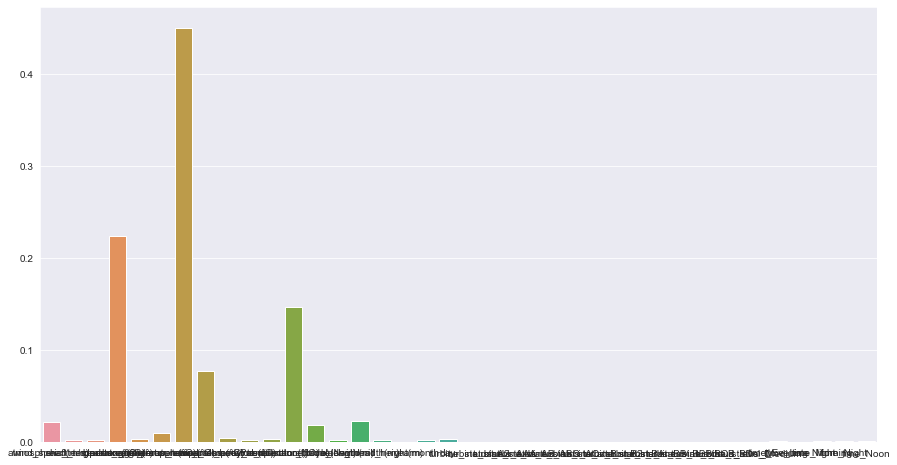



****************************************************************************************************




In [77]:
random_fi = feature_importance(["Random Forest Regressor" , RandomForestRegressor(random_state = 42)] , X_train , y_train)

In [78]:
random_df = pd.DataFrame(random_fi , columns = ["Feature Importances" , "Feartures"]).sort_values(by = ["Feature Importances"] , ascending = False).reset_index(drop = True)

In [79]:
random_df

,Feature Importances,Feartures
0,0.450157,generator_temperature(°C)
1,0.224006,blades_angle(°)
2,0.146417,resistance(ohm)
3,0.077485,atmospheric_pressure(Pascal)
4,0.022287,blade_breadth(m)
5,0.021890,wind_speed(m/s)
6,0.017906,rotor_torque(N-m)
7,0.009206,engine_temperature(°C)
8,0.003921,area_temperature(°C)
9,0.003340,gearbox_temperature(°C)


In [80]:
random = pre_final[0][1]

In [81]:
random.fit(X_train , y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
preds = random.predict(X_test)

In [83]:
preds

array([1.3053744, 1.3845638, 2.23881  , ..., 0.9889946, 2.012739 ,
       2.3981686], dtype=float32)

In [84]:
random_preds = random.predict(test)

In [85]:
random_preds

array([1.3183262, 1.2775177, 1.4889022, ..., 1.8627015, 1.8027927,
       2.448229 ], dtype=float32)

In [87]:
data = {"tracking_id" : ids , 
        "datetime" : datetime ,
        "windmill_generated_power(kW/h)" : random_preds}
final = pd.DataFrame(data)

In [88]:
final.head()

,tracking_id,datetime,windmill_generated_power(kW/h)
0,WM_19817,2019-04-17 08:53:20,1.318326
1,WM_18723,2019-03-30 07:43:20,1.277518
2,WM_34552,2019-08-10 11:33:20,1.488902
3,WM_28570,2019-06-26 03:53:20,1.877212
4,WM_36934,2019-08-27 16:43:20,1.544635


In [ ]:
# final.to_csv("Power Prediction HackerEarth.csv" , index = False)